# Group 31: Placement Prediction

**Group members:** Jeff Hu, Daniel Truong, Longyi Yuan, Mohith Baskaran

**Course:** STAT 301

**Date:** April 7th

In [10]:
library(tidyverse)
library(repr)
library(infer)
library(dplyr)
library(cowplot)
library(broom)
library(rsample)
library(MASS)      
library(caret)
library(car)

# I. Introduction:

Let’s set the scene: securing a job placement has always been a big concern for many students, especially in a climate where everyone’s hustling hard. Colleges encourage skill-building activities (like internships, projects, and workshops), emphasizing both hard skills and soft skills, hoping these experiences increase the odds of landing a job. Naturally, we can’t overlook traditional academic performance measures such as CGPA, SSC, and HSC marks. And that’s where our dataset steps in, providing detailed info on academic achievements, skill-enhancement activities, personal attributes (like AptitudeTestScore and SoftSkillRating), and whether or not a student got placed.

With so many facets playing into job outcomes, we want to explore whether a particular factor—like CGPA, internship count, or extracurricular involvement—actually connects with better placement prospects. This question is important not just for students to plan their college activities, but also for educational institutions looking to refine their training programs.

**Questions for Investigation**

**1. Inference Question:**

• How do academic achievements (CGPA, SSC_Marks, HSC_Marks), skill-enhancement activities (Internships, Projects, Workshops/Certifications), and personal attributes (AptitudeTestScore, SoftSkillsRating, ExtracurricularActivities) each relate to the probability of a student getting placed?
	
• Goal: We’re aiming to see which factors stand out as statistically significant predictors for job placement when we perform a logistic regression. This helps us understand the association between each predictor and the likelihood of securing a job offer.
	
**2.(Optional) Predictive Angle:**
	
• If we were to build a model for prediction, how accurately could we predict whether a student will get placed, based on these academic, skill-enhancement, and personal attributes?
	
• Goal: While we care more about inference here, it’s still interesting to see if our regression model can generate reasonably accurate predictions, even though the main emphasis remains on understanding the factors themselves.

These questions can definitely be addressed with the variables in our dataset. We have a clearly defined outcome (PlacementStatus) and multiple predictors (CGPA, SSC/HSC marks, Internships, Projects, Workshops/Certifications, AptitudeTestScore, SoftSkillRating, ExtracurricularActivities) that can be fed into a logistic regression for an interpretative deep dive.

Our primary focus is understanding and interpreting the links between predictors and placement success. By learning which variables matter most, students can be more strategic about where to invest their time, and educators can tweak training programs to support students in landing their dream roles.

# II. Methods and results:

# a) Data

## Data description

Below is a summary table of the dataset variables: The dataset contains 10000 observations and 11 variables, each representing an individual student. The variables capture a range of academic, personal, and training-related characteristics that may influence whether a student is placed or not. The table below describes all the varlables in the dataset.

In [2]:
summary_table <- data.frame(
  Variable = c(
    "CGPA", "Internships", "Projects", "Workshops/Certifications",
    "ApptitudeTestScore", "SoftSkillrating", "ExtraCurricularActivities",
    "PlacementTraining", "SSC", "HSC", "PlacementStatus"
  ),
  Type = c(
    "Numeric", "Integer", "Integer", "Integer",
    "Numeric", "Numeric", "Integer",
    "Binary (0 = No, 1 = Yes)", "Numeric", "Numeric", "Categorical"
  ),
  Description = c(
    "Overall grades achieved by the student",
    "Number of internships a student has done",
    "Number of projects a student has completed",
    "Online courses taken to upskill themselves",
    "Score from aptitude tests (Quant & logic)",
    "Soft skill (e.g., communication) rating",
    "Involvement in non-academic activities",
    "Whether placement training was taken",
    "Senior Secondary marks",
    "Higher Secondary marks",
    "Target variable: Placed or Not Placed"
  )
)
summary_table

Variable,Type,Description
<chr>,<chr>,<chr>
CGPA,Numeric,Overall grades achieved by the student
Internships,Integer,Number of internships a student has done
Projects,Integer,Number of projects a student has completed
Workshops/Certifications,Integer,Online courses taken to upskill themselves
ApptitudeTestScore,Numeric,Score from aptitude tests (Quant & logic)
SoftSkillrating,Numeric,"Soft skill (e.g., communication) rating"
ExtraCurricularActivities,Integer,Involvement in non-academic activities
PlacementTraining,"Binary (0 = No, 1 = Yes)",Whether placement training was taken
SSC,Numeric,Senior Secondary marks


In [3]:
url <- "https://raw.githubusercontent.com/Arcyill/STAT-301-Project/refs/heads/main/placementdata.csv"

placementData <- read.csv(url)

## Source and Information
The dataset used in this analysis is from the Kaggle Placement Prediction Dataset and was collected to study student placement outcomes based on academic performance, training efforts, and personal attributes.

• Data Source: Kaggle

• Collection Method: The dataset consists of 10,000 student records, each with 11 variables capturing academic scores, skill-building activities, and placement status.

• Citation: https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data

## Pre-selection

While it may be hard to determine what vairables to drop at this stage, we can drop StudentID because it just a unique identifier for each student, meaning it has no predictive power or meaningful relationship with PlacementStatus. Removing it will prevent unnecessary noise in our analysis and improve model interpretability


In [4]:
placementData <- placementData |>
    dplyr::select(-StudentID)

head(placementData)

,CGPA,Internships,Projects,Workshops.Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced


# b) Exploratory Data Analysis (EDA)

## Data cleaning

In [5]:
placementData <- placementData |> drop_na()
head(placementData)

,CGPA,Internships,Projects,Workshops.Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced


## Visualizations

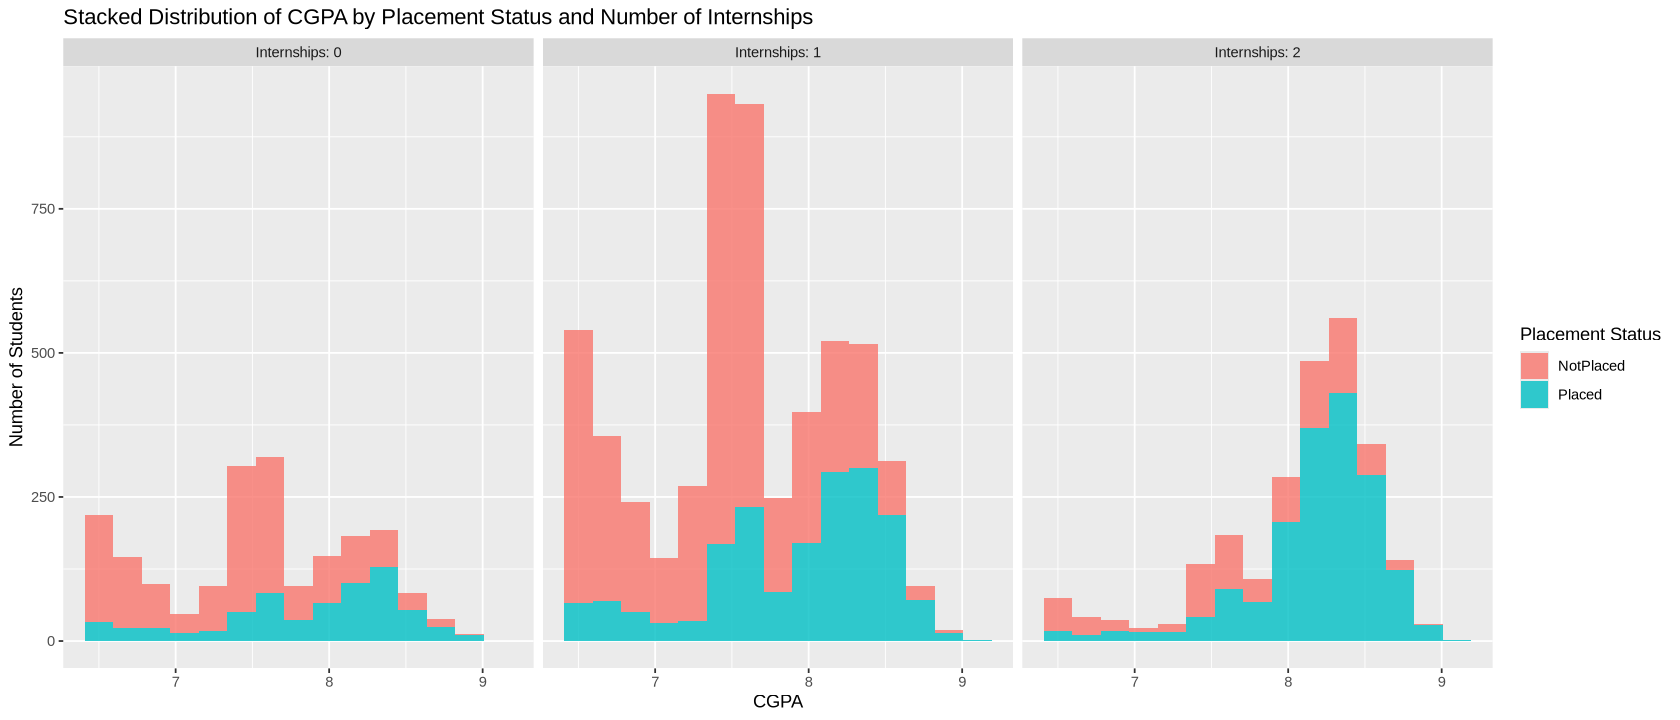

In [6]:
options(repr.plot.width = 14, repr.plot.height = 6) #changing the dimensions of the graph



ggplot(placementData, aes(x = CGPA, fill = PlacementStatus)) + 
  geom_histogram(position = "stack", alpha = 0.8, bins = 15) + #stacked histograms of CGPA filled by PlacementStatus
  facet_wrap(~ Internships, labeller = label_both) + #splitting the plots based on the number of internships.  
  labs( 
    title = "Stacked Distribution of CGPA by Placement Status and Number of Internships",
    x = "CGPA",
    y = "Number of Students",
    fill = "Placement Status" 
  )#Labels

The function in R to fit a logistic regression requires either a numerical response (0 and 1) or a `factor`, with two levels (note that R stores factors as integers). 

Mathematically, we have to construct a binary response $Y_i$ that flags the successes for a given event of interest: 

$$
Y_i =
\begin{cases}
1 \; \; \; \; \mbox{if the $i$th observation is Placed},\\
0 \; \; \; \; 	\mbox{if the $i$th observation is NotPlaced}
\end{cases}
$$

Therefore, we will change PlacementStatus with values consisting of 1s and 0s. 

In [7]:
placementData <- placementData %>%
#We will do the same with other binary data
        mutate(ExtracurricularActivities = if_else(ExtracurricularActivities == "Yes", 1, 0),       
        PlacementTraining = if_else(PlacementTraining == "Yes", 1, 0),
        PlacementStatus = if_else(PlacementStatus == "Placed", 1, 0))
head(placementData)


,CGPA,Internships,Projects,Workshops.Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,7.5,1,1,1,65,4.4,0,0,61,79,0
2,8.9,0,3,2,90,4.0,1,1,78,82,1
3,7.3,1,2,2,82,4.8,1,0,79,80,0
4,7.5,1,1,2,85,4.4,1,1,81,80,1
5,8.3,1,2,2,86,4.5,1,1,74,88,1
6,7.0,0,2,2,71,4.2,1,0,55,66,0


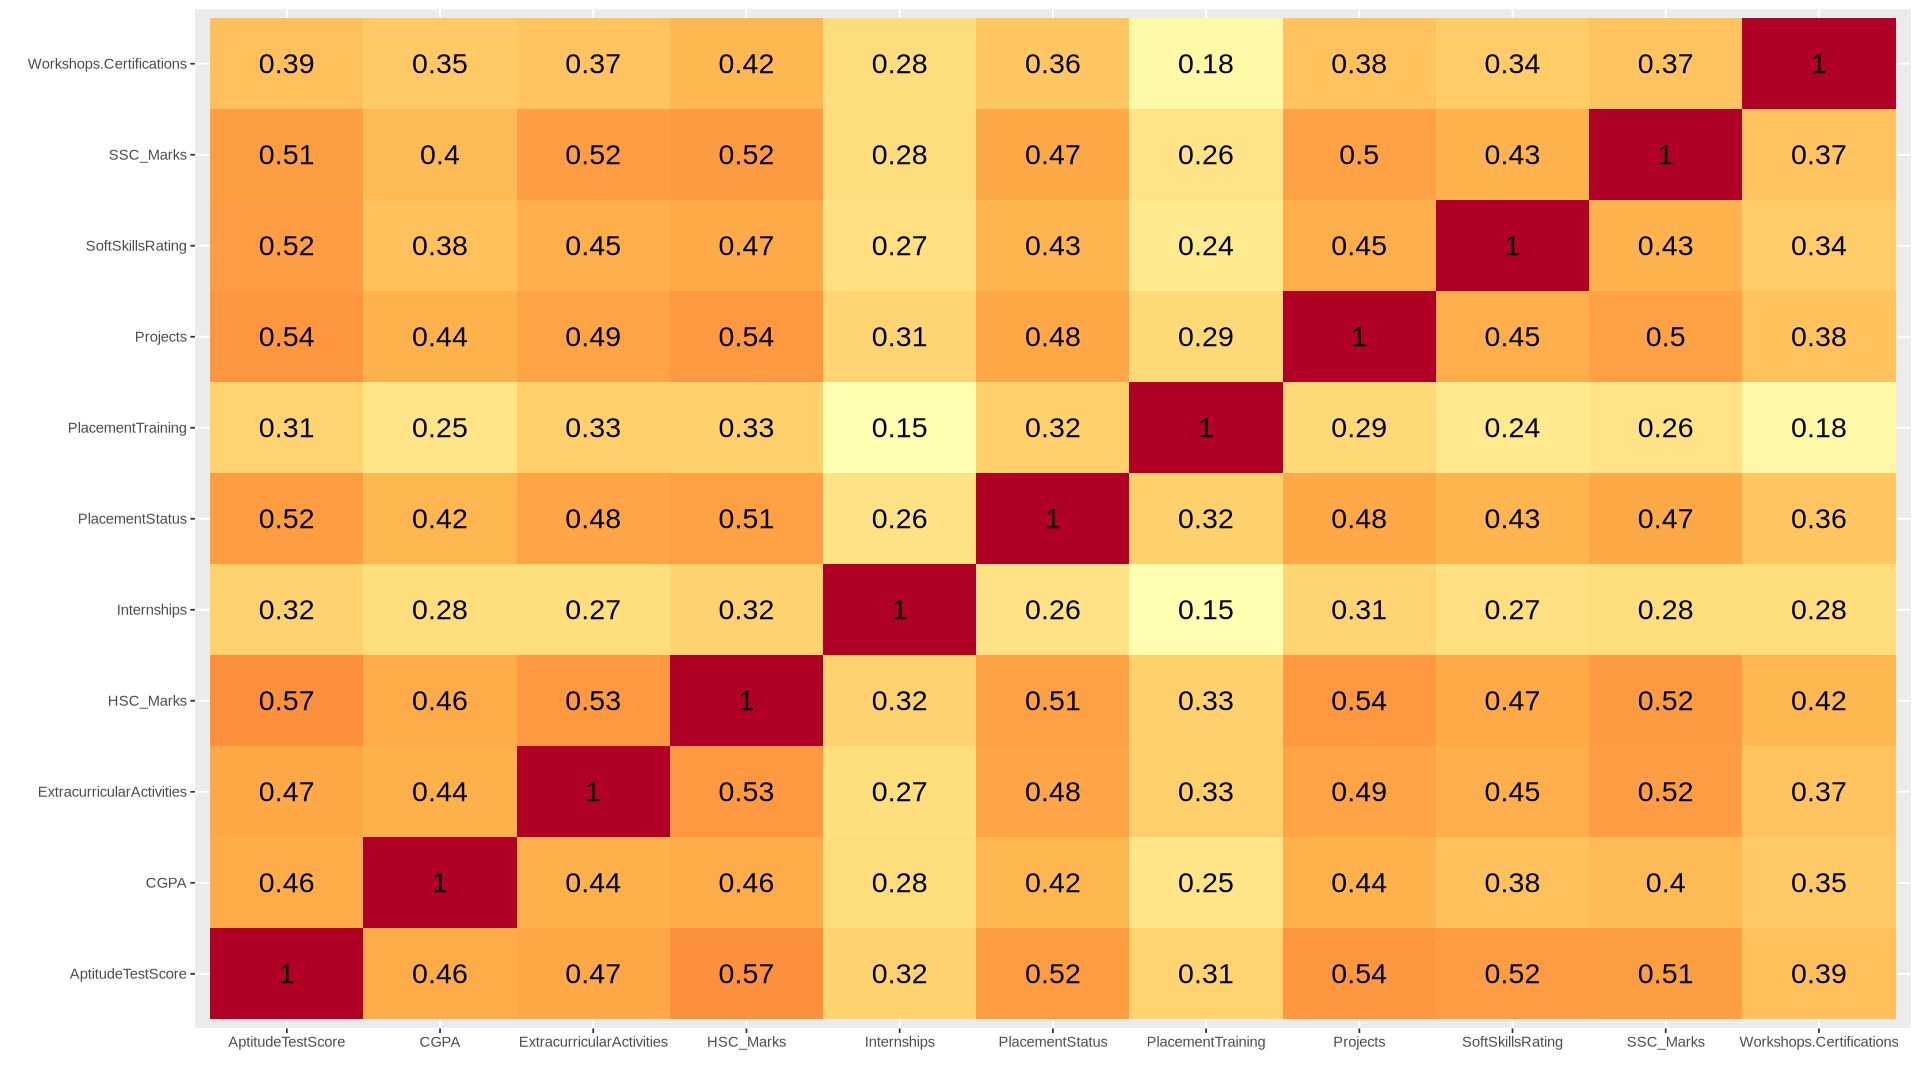

In [8]:
# Set plot dimensions for better visibility
options(repr.plot.width = 16, repr.plot.height = 9)

# Create correlation heatmap data pipeline
data_heatgraph <- placementData |> 
  cor() |>  #Compute correlation matrix for all numeric variables
  as.data.frame() |> # Convert matrix to dataframe for tidy manipulation
  rownames_to_column(var = "var1") |> #Convert row names (variables) into a dedicated column
  pivot_longer(-var1, names_to = "var2", values_to = "corr")  #Reshape to long format (var1, var2, correlation value)

# Build the heatmap visualization
heatgraph <- data_heatgraph |> 
  ggplot(aes(x = var1, y = var2)) +
    geom_tile(aes(fill = corr)) +  #Create heatmap tiles colored by correlation strength
    scale_fill_distiller(
      "Correlation Coefficient \n",
      palette = "YlOrRd",
      direction = 1
    ) +  #Apply color scale
    labs(x = "", y = "") + # Remove axis labels
    geom_text(
      aes(label = round(corr, 2)),
      color = "black",
      size = 6 
    ) +  # Add correlation values as text labels
    theme(legend.position = "none")  # Remove legend

# Display the plot
heatgraph

# c) Methods: Plan